ETL

In [2]:
pip install matplotlib


In [3]:
#importar bibliotecas, utilizando abreviações para chama-las no decorrer do código
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#Leitura do arquivo csv
df = pd.read_csv("titanic.csv")

In [5]:
#exibe as linhas da tabela solicitado dentro do parênteses
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#leitura das quantidades de linhas e colunas (boa prática)
df.shape

(891, 12)

In [7]:
#backup salva os dados neste momento sem os tratamento, sem alteração em uma variável
df_backup = df.copy()

In [8]:
#Contar dados nulos em cada coluna isnull conta e o sum soma, aqui considera em y, colunas
nulos_por_colunas = df.isnull().sum()
print(nulos_por_colunas)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:
#Contar dados nulos por linhas axis=1 indica que a contagem será por linhas, só tem a opção de true e false, 0 e 1
nulos_por_linhas = df.isnull().sum(axis=1)
print(nulos_por_linhas)

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    2
889    0
890    1
Length: 891, dtype: int64


In [10]:
#descrição dos dados matemáticos(conta, média, desvio- padrão, minimo,...)
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
#Verificação das informações
info_df = df.info()
print(info_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [12]:
#Remover linhas duplicadas, mas tem outra opção da aula passada 
df = df.drop_duplicates() #salva a informação de exclução dentro desta variável, apaga
# Cria um novo DF com as duplicatas removidas. 
# O DF original permanece inalterado.
# É necessário atribuir o resultado a uma nova variável (neste caso, df) para usar o DF modificado.

#ou df.drop_duplicates(inplace=True)
# Remove duplicatas diretamente do DataFrame original.
# O DF original é modificado no local.
# Não há necessidade de atribuir o resultado a uma nova variável.

In [13]:
#confirmar as alterações da remoção das linhas duplicadas, equivalente ao inplace 
df.shape

(891, 12)

In [14]:
#Apagar linhas duplicadas da coluna específica
df_teste = df.drop_duplicates(["PassengerId"]) 

In [15]:
df_teste.shape

(891, 12)

In [16]:
#função das linhas duplicadas: identificar e retornar todas as linhas duplicadas em um DF do Pandas
def visualizar_as_duplicadas(df):
    duplicados = df[df.duplicated(keep=False)] # keep identifica todas as linhas duplicadas, iriam aparecer em baixo das colunas
    return duplicados

linhas_duplicadas = visualizar_as_duplicadas(df)
print(linhas_duplicadas)

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


In [17]:
#Apagar colunas no DF
df = df.drop(columns=["SibSp", "Parch"])

In [18]:
df.shape

(891, 10)

Observar sempre quais dados estão utilizando no seu estudo antes de apagar

In [19]:
#Apagar as informações NaN(valor nulo) da coluna, tem que observar se a coluna tem NaN. subset
df_teste = df.dropna(subset=["Cabin"])
#apaga toda a linha que possui NaN

In [20]:
df_teste.shape

(204, 10)

In [21]:
#Resertar index (true irá apagar, só teste pois n tem na planilha
df = df.reset_index(drop=True)
#redefine o índice do DF, atribuindo-lhe uma sequência numérica contínua começando de 0.
# É útil quando você precisa trabalhar com um índice numérico simples e contínuo em um DataFrame.
# Ela é frequentemente usada antes de operações que dependem de um índice numérico, como o acesso a elementos por localização ou o agrupamento.
# Ao usar drop=True, você evita a criação de uma coluna adicional que pode ser desnecessária.

In [22]:
#Renomear as Colunas
df.rename(columns={ 
    'PassengerId': 'IdPassageiro', 
    'Survived': 'Sobreviveu', 
    'Pclass': 'Classe', 
    'Name': 'Nome', 
    'Sex': 'Gênero', 
    'Age': 'Idade', 
    'Ticket': 'Bilhete',
    'Fare': 'Tarifa', 
    'Cabin': 'Cabine', 
    'Embarked': 'Embarque'
    }, inplace=True)

In [23]:
df.columns #verificar os nomes das colunas p a próxima etapa

Index(['IdPassageiro', 'Sobreviveu', 'Classe', 'Nome', 'Gênero', 'Idade',
       'Bilhete', 'Tarifa', 'Cabine', 'Embarque'],
      dtype='object')

In [24]:
#Salvar no CSV - 
df.to_csv("titanic_tratado.csv", index=False)

Análises

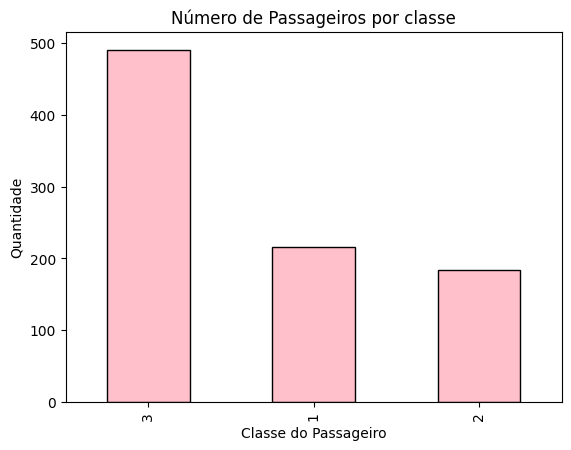

In [25]:
#Quantos passageiros estavam em cada classe do Titanic?

#contagem do número de passageiros

contagem_passageiros = df["Classe"].value_counts()

#Criação do gráfico, tipo barra
contagem_passageiros.plot(kind="bar", edgecolor="black", color='pink') 

#configurações dos eixos e título
plt.xlabel("Classe do Passageiro") 
plt.ylabel("Quantidade")
plt.title("Número de Passageiros por classe")

#Exibição do gráfico
plt.show()  

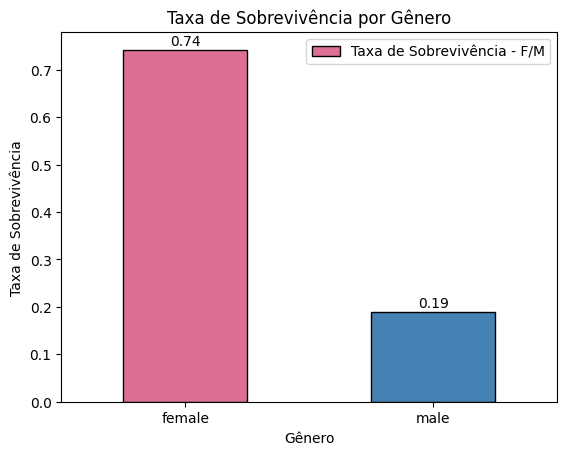

In [26]:
#Qual a taxa de sobreviventes por gênero? 

# agrupamento de gênero por sobreviventes, através da média
taxa_sob_genero = df.groupby("Gênero")["Sobreviveu"].mean()

#cores para barras
cores = ['palevioletred', 'steelblue']

#plotagem
barras = taxa_sob_genero.plot.bar(edgecolor ="black", color = cores)

#rótulos
plt.xlabel("Gênero")
plt.ylabel("Taxa de Sobrevivência")
plt.title("Taxa de Sobrevivência por Gênero")

#Adicionar Legendas
plt.legend(["Taxa de Sobrevivência"])  
plt.xticks(rotation=0)
plt.legend(["Taxa de Sobrevivência - F/M"])

#adicionar rótulos nos gráficos (conta as informações do gráfico)
for i, v in enumerate(taxa_sob_genero):
    barras.text(i, v + 0.01, f'{v:.2f}', color="black", ha="center")

#exibição
plt.show()



Distribuição de Idade

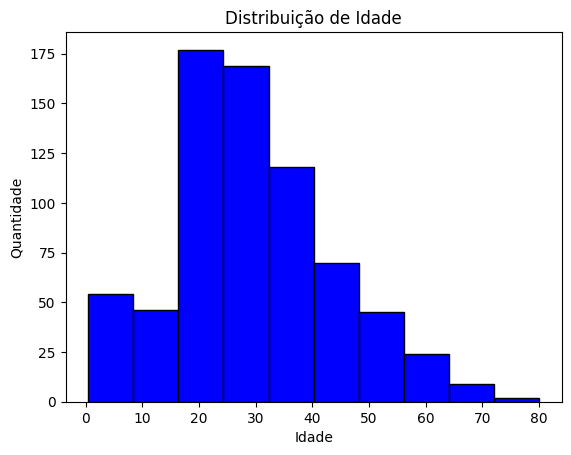

In [27]:
#Qual é a distribuição de idades?

#plotagem: só analisaremos as informações de uma coluna Idade - bins quant de intervalo
df["Idade"].plot.hist(bins=10, edgecolor= "black", color="blue")

plt.xlabel("Idade")
plt.ylabel("Quantidade")
plt.title("Distribuição de Idade")

plt.show()


Teste Hipóteses
Teste de Idade e Sobrevicência

Hipótese Nula H0: Os sobreviventes não tem relacão com a Idade dos passageiros. 
Hipótese Alternativa H1: Sobreviventes tem relação com a Idade dos passageiros.

In [3]:
from scipy.stats import ttest_ind

Teste T de idade
Estatística T : -2.06668694625381
Valor P: 0.03912465401348249


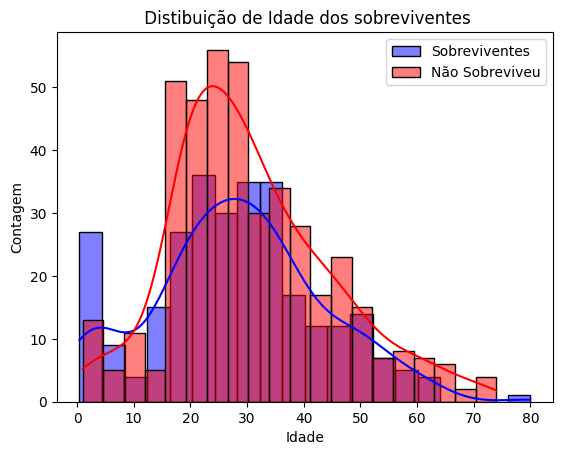

Rejeitamos a hipótese nula


In [37]:
#amostras
idade_sobriventes = df[df['Sobreviveu']== 1]['Idade'].dropna() #traz inf iguais a 1, pois a coluna só tem 2 informações T ou F, dropna removerá qq valor NaN
idade_nao_sobreviveu = df[df['Sobreviveu']==0]['Idade'].dropna()

# Teste t
estatistica_t, valor_p = ttest_ind(idade_sobriventes, idade_nao_sobreviveu)

print("Teste T de idade")
print(f"Estatística T : {estatistica_t}")
print(f"Valor P: {valor_p}")

#grafico
sns.histplot(idade_sobriventes, color= 'blue', label ='Sobreviventes', kde=True, bins= 20)
sns.histplot(idade_nao_sobreviveu, color = 'red', label = 'Não Sobreviveu', kde=True, bins= 20)

#rotulos
plt.legend()
plt.title(" Distibuição de Idade dos sobreviventes")
plt.xlabel("Idade")
plt.ylabel("Contagem")
plt.show()

#interpretação
if valor_p < 0.05:
    print("Rejeitamos a hipótese nula")
else:
    print("Não rejeitamos a hipótese nula")

In [38]:
df.head(3)

,IdPassageiro,Sobreviveu,Classe,Nome,Gênero,Idade,Bilhete,Tarifa,Cabine,Embarque
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S


Amostra e SQL

In [43]:
#amostra (nova amostra p n sobrecarregar o DF)
baby_df = df.sample(100) #pegará linhas aleatórios dentro do meu DF original e armazenará dentro deste novo

In [44]:
baby_df.head(3)

,IdPassageiro,Sobreviveu,Classe,Nome,Gênero,Idade,Bilhete,Tarifa,Cabine,Embarque
570,571,1,2,"Harris, Mr. George",male,62.0,S.W./PP 752,10.5000,NaN,S
785,786,0,3,"Harmer, Mr. Abraham (David Lishin)",male,25.0,374887,7.2500,NaN,S
474,475,0,3,"Strandberg, Miss. Ida Sofia",female,22.0,7553,9.8375,NaN,S


In [45]:
baby_df.shape #conferindo o número de linhas e colunas

(100, 10)

In [46]:
import sqlite3

In [47]:
#Manipular uma consulta (Carrie) de SQL no pandas
# conexão 
conn = sqlite3.connect(':memory:')

#escrever o df em uma tabela sql
baby_df.to_sql('baby_df', conn, index=False, if_exists='replace') 

#executar a consulta 
query_sql = """
SELECT Gênero, COUNT(IdPassageiro) AS Contagem
FROM baby_df
GROUP BY Gênero;
"""

contagem_por_gen = pd.read_sql_query(query_sql, conn) #nova variável que irá ler em pandas o SQL conn = conectar
print(contagem_por_gen)

#fechar a conexão
conn.close() #fechar a coneção

   Gênero  Contagem
0  female        37
1    male        63


Análise em Pandas

In [48]:
contagem_por_genero = baby_df['Gênero'].value_counts().reset_index
#Cria um novo DF com duas colunas: uma para os gêneros e outra para as respectivas contagens./ reseta o índice
contagem_por_genero.columns = ['Gênero', 'Contagem'] #os valores serão incluidos nas duas colunas descritas
print(contagem_por_genero)

   Gênero  Contagem
0    male        63
1  female        37
